In [68]:
import numpy as np  
import pandas as pd 
from scipy.cluster.hierarchy import dendrogram, linkage  
import matplotlib.pyplot as plt   
%matplotlib inline

In [69]:
data = pd.read_csv('dataset\shopping_data.csv')  

In [70]:
data.head(10)  

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [71]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
CustomerID                200 non-null int64
Genre                     200 non-null object
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [72]:
data = data.iloc[:, 3:5].values  

## Making a dendrogram

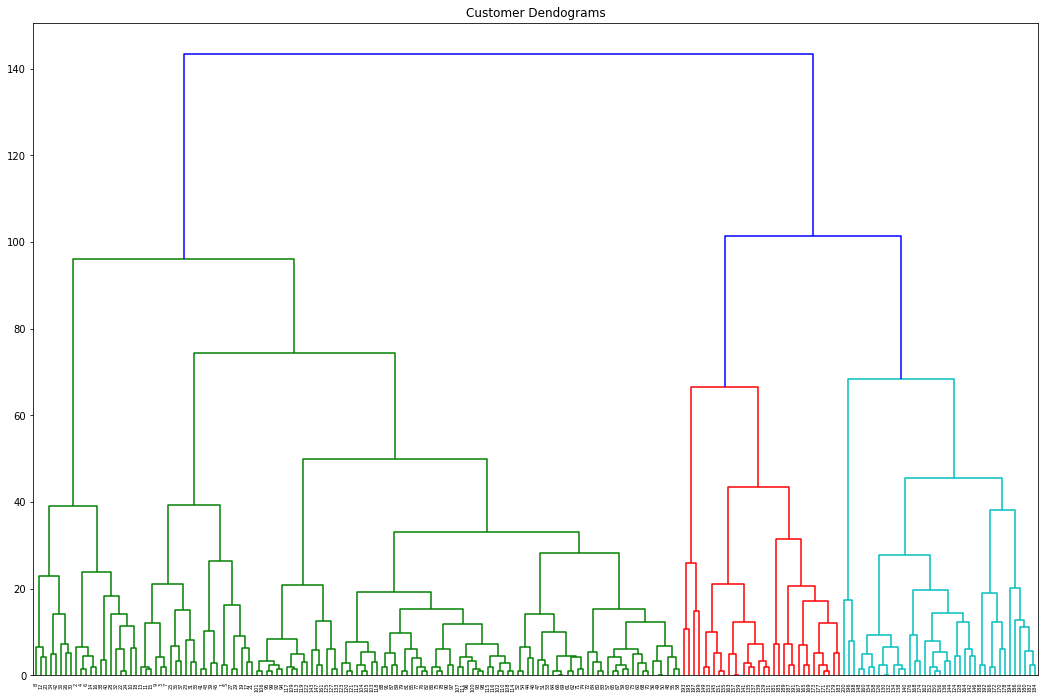

In [73]:
linked = linkage(data, 'complete')

labelList = range(1, 201)

plt.figure(figsize=(18,12))  
plt.title("Customer Dendograms")  

dendrogram(linked,  
            orientation='top',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True)
plt.show()  

Longest vertical distance without any horizontal line passing through it is selected and a horizontal line is drawn through it. 
The number of vertical lines this newly created horizontal line passes is equal to number of clusters. 

So , here no. of clusters comes one to be 5

## Using top down hierarchical approach for clustering => AgglomerativeClustering

In [74]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=5, affinity='manhattan', linkage='average')  
cluster.fit_predict(data)

array([1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 4, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 4,
       1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0], dtype=int64)

## Visualizing the clusters formed

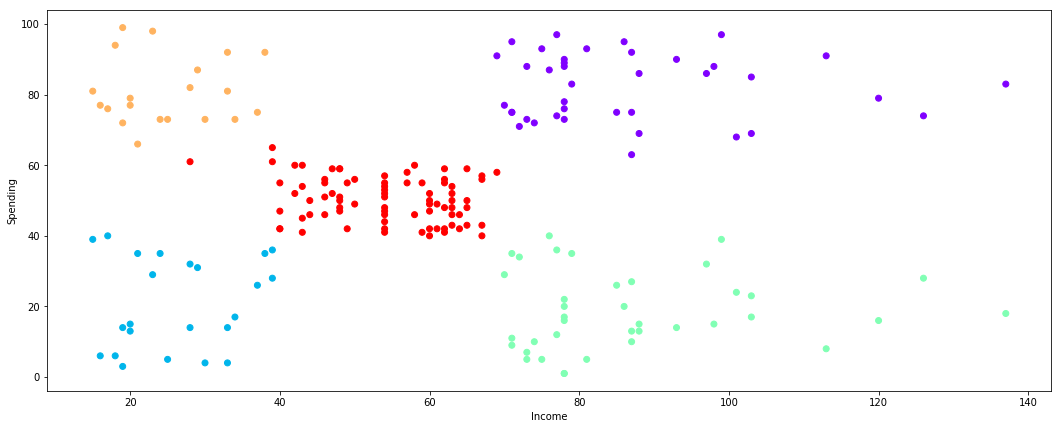

In [75]:
plt.figure(figsize=(18,7))  
plt.xlabel('Income')
plt.ylabel('Spending')
plt.scatter(data[:,0], data[:,1], c=cluster.labels_, cmap='rainbow')  